<a href="https://colab.research.google.com/github/vladijarosz/Mercado-de-Valores/blob/main/Inflacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [523]:
!wget -inflacion.xlsx "https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/inflacion.xlsx"

import pandas as pd
df = pd.read_excel("inflacion.xlsx")




--2025-12-08 19:06:50--  https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/inflacion.xlsx
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/refs/heads/main/datos/inflacion.xlsx [following]
--2025-12-08 19:06:50--  https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/refs/heads/main/datos/inflacion.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12282 (12K) [application/octet-stream]
Saving to: ‘inflacion.xlsx.45’

inflacion.xlsx.45   100%[===================>]  11.99K  --.-KB/s    in 0s      

2025-12-08 19:06:50 (41.2 MB/s)

In [524]:
df = df.rename(columns={df.columns[0]: "fecha"})
df = df.rename(columns={df.columns[1]: "IPC"})
df.set_index("fecha", inplace=True)
df.index = pd.to_datetime(df.index)

df

,IPC
fecha,
2017-01-31,1.6
2017-02-28,2.1
2017-03-31,2.4
2017-04-30,2.7
2017-05-31,1.4
...,...
2025-06-30,1.6
2025-07-31,1.9
2025-08-31,1.9


In [525]:
inflacion_2024=df.loc["2023-12-31":"2024-12-31"]
inflacion_2024

,IPC
fecha,
2023-12-31,25.5
2024-01-31,20.6
2024-02-29,13.2
2024-03-31,11.0
2024-04-30,8.8
2024-05-31,4.2
2024-06-30,4.6
2024-07-31,4.0
2024-08-31,4.2


In [526]:
inflacion_2024['IPC_indice'] = (1 + inflacion_2024['IPC'] / 100).cumprod() * 100

# Ordenamos en orden ascendente para calcular bien el acumulado
inflacion_2024 = inflacion_2024.sort_index(ascending=False)

# Calculamos el índice acumulado del IPC (asumiendo que IPC es inflación mensual en %)
inflacion_2024['factor'] = (1 + inflacion_2024['IPC'].shift(1)/100).cumprod()

# Si quieres el deflactor relativo al último mes (más reciente), normalizas
inflacion_2024['deflactor'] = 100
inflacion_2024['deflactor'] = inflacion_2024['deflactor'].iloc[-1] / inflacion_2024['factor']



inflacion_2024

/tmp/ipython-input-290837856.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,IPC,IPC_indice,factor,deflactor
fecha,,,,
2024-12-31,2.7,273.193895,NaN,NaN
2024-11-30,2.4,266.011582,1.027000,97.370983
2024-10-31,2.7,259.776936,1.051648,95.088851
2024-09-30,3.5,252.947357,1.080042,92.588949
2024-08-31,4.2,244.393582,1.117844,89.457922
2024-07-31,4.0,234.542785,1.164793,85.852133
2024-06-30,4.6,225.521908,1.211385,82.550127
2024-05-31,4.2,215.604119,1.267109,78.919816
2024-04-30,8.8,206.913742,1.320327,75.738787


In [527]:
inflacion_2024['deflactor'].iloc[0]=100



/tmp/ipython-input-3700354909.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




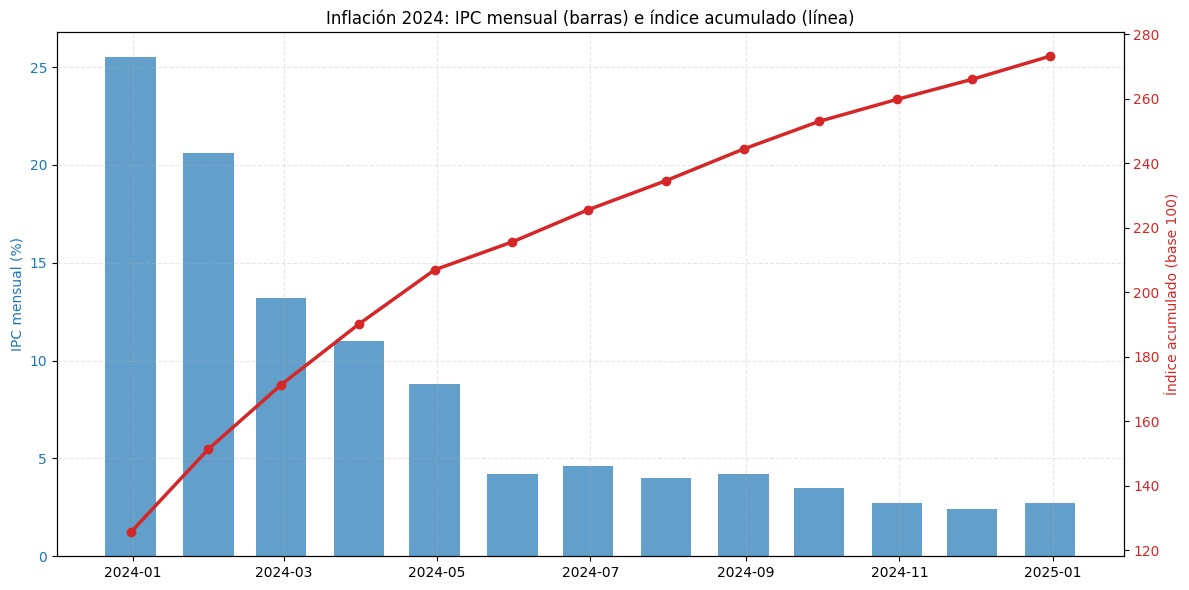

In [528]:
import matplotlib.pyplot as plt

# Asegurar índice datetime
inflacion_2024.index = pd.to_datetime(inflacion_2024.index)

fig, ax1 = plt.subplots(figsize=(12,6))

# --- EJE IZQUIERDO: barras IPC ---
ax1.bar(
    inflacion_2024.index,
    inflacion_2024['IPC'],
    width=20,
    alpha=0.7,
    color='tab:blue',
    label='IPC mensual (%)'
)
ax1.set_ylabel('IPC mensual (%)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# --- EJE DERECHO: línea índice acumulado ---
ax2 = ax1.twinx()
ax2.plot(
    inflacion_2024.index,
    inflacion_2024['IPC_indice'],
    color='tab:red',
    linewidth=2.5,
    marker='o',
    label='IPC índice (base 100, ene 2024)'
)
ax2.set_ylabel('Índice acumulado (base 100)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Título y grid
plt.title('Inflación 2024: IPC mensual (barras) e índice acumulado (línea)')
ax1.grid(True, linestyle='--', alpha=0.3)

fig.tight_layout()
plt.show()


In [529]:
import plotly.graph_objects as go

fig = go.Figure()

# --- Barras IPC mensual ---
fig.add_trace(
    go.Bar(
        x=inflacion_2024.index,
        y=inflacion_2024['IPC'],
        name='IPC mensual (%)',
        marker_color='steelblue',
        opacity=0.75,
        yaxis='y1'
    )
)

# --- Línea IPC índice ---
fig.add_trace(
    go.Scatter(
        x=inflacion_2024.index,
        y=inflacion_2024['IPC_indice'],
        name='IPC índice (base 100)',
        mode='lines+markers',
        line=dict(width=3, color='crimson'),
        marker=dict(size=8),
        yaxis='y2'
    )
)

# --- Configuración de ejes ---
fig.update_layout(
    title='Inflación 2024: IPC mensual y índice acumulado',
    xaxis=dict(title='Fecha'),

    yaxis=dict(
        title='IPC mensual (%)',
        side='left',
        showgrid=True
    ),

    yaxis2=dict(
        title='Índice acumulado (base 100)',
        overlaying='y',
        side='right'
    ),

    bargap=0.2,
    template='plotly_white',
    legend=dict(orientation='h', y=-0.2)
)

fig.show()


In [530]:
!wget -O MEP.csv "https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/MEP.csv"

import pandas as pd
df_mep = pd.read_csv("MEP.csv")
df_mep['fecha'] = pd.to_datetime(df_mep['fecha'])
df_mep['mep'] = pd.to_numeric(df_mep['ultimo'], errors='coerce')
df_mep.sort_values('fecha', inplace=True)

--2025-12-08 19:06:50--  https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/MEP.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/refs/heads/main/datos/MEP.csv [following]
--2025-12-08 19:06:50--  https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/refs/heads/main/datos/MEP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149475 (146K) [text/plain]
Saving to: ‘MEP.csv’

MEP.csv             100%[===================>] 145.97K  --.-KB/s    in 0.02s   

2025-12-08 19:06:51 (6.43 MB/s) - ‘MEP.csv’ saved [149475/149475]



In [531]:
import plotly.graph_objects as go

fig = go.Figure()

# Agregamos la línea del MEP
fig.add_trace(go.Scatter(x=df_mep['fecha'], y=df_mep['mep'], mode='lines', name='MEP', line=dict(color='green')))

# Configuramos el diseño con barra de rango (selector)
fig.update_layout(
    title='Dólar MEP con barra selectora',
    xaxis_title='Fecha',
    yaxis_title='Precio MEP',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1a", step="year", stepmode="backward"),
                dict(step="all", label="Todo")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    hovermode='x unified'
)

fig.show()



In [532]:
df_mep['fecha']=pd.to_datetime(df_mep['fecha'])
df_mep.set_index('fecha', inplace=True)
mep=df_mep['ultimo']
mep=mep.loc["2023-12-31":"2024-12-31"]
mep

,ultimo
fecha,
2024-01-02,991.30
2024-01-03,1033.56
2024-01-04,1050.43
2024-01-05,1104.93
2024-01-08,1141.62
...,...
2024-12-23,1162.30
2024-12-24,1160.97
2024-12-26,1170.89


In [533]:
# Convert the Series 'mep' into a DataFrame.
# The original 'ultimo' values will become a column named 'ultimo'.
# The index will remain the same.
mep = mep.to_frame(name='ultimo')

# Ensure the index is a DatetimeIndex
mep.index = pd.to_datetime(mep.index)

# Create the 'mes' column as the first day of each month
mep['mes'] = mep.index.to_period('M').to_timestamp()


In [534]:
mep.index

DatetimeIndex(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-15',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='fecha', length=246, freq=None)

In [535]:
inflacion_2024['mes'] = inflacion_2024.index.to_period('M').to_timestamp()

# Hacer merge por mes
df = mep.merge(
    inflacion_2024[['mes', 'deflactor']],
    on='mes',
    how='left'
)
df['mep_precios_deflactados'] = (df['ultimo'] / (df['deflactor']/100))
df['fecha']=mep.index
df

,ultimo,mes,deflactor,mep_precios_deflactados,fecha
0,991.30,2024-01-01,55.401311,1789.307831,2024-01-02
1,1033.56,2024-01-01,55.401311,1865.587614,2024-01-03
2,1050.43,2024-01-01,55.401311,1896.038157,2024-01-04
3,1104.93,2024-01-01,55.401311,1994.411279,2024-01-05
4,1141.62,2024-01-01,55.401311,2060.637149,2024-01-08
...,...,...,...,...,...
241,1162.30,2024-12-01,100.000000,1162.300000,2024-12-23
242,1160.97,2024-12-01,100.000000,1160.970000,2024-12-24
243,1170.89,2024-12-01,100.000000,1170.890000,2024-12-26
244,1170.56,2024-12-01,100.000000,1170.560000,2024-12-27


In [536]:
import plotly.express as px

fig = px.line(
    df,
    x='fecha',
    y='mep_precios_deflactados',
    title='Dólar MEP a precios constantes (deflactado)',
    labels={
        'fecha': 'Fecha',
        'mep_precios_deflactados': 'MEP real (base 100)'
    }
)

fig.update_layout(
    template='plotly_white',
    hovermode='x unified'
)

fig.update_traces(line=dict(width=3))

fig.show()


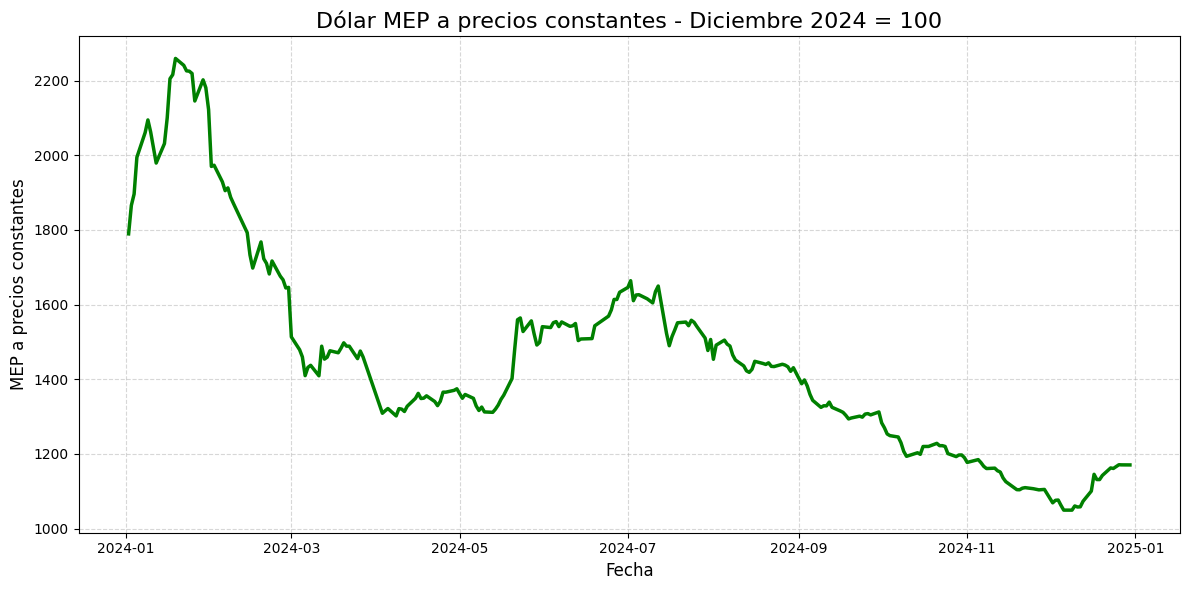

In [538]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['fecha'], df['mep_precios_deflactados'], color='green', linewidth=2.5)

plt.title('Dólar MEP a precios constantes - Diciembre 2024 = 100', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('MEP a precios constantes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()
